In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


from sklearn.datasets import make_classification


In [22]:
class Adaboost:
    def __init__(self,M):
        self.M=M
    def fit(self,X,Y):
        self.models =[]
        self.alphas=[]
        
        N, _ =X.shape
        W = np.ones(N)/N
        
        for m in range(self.M):
            tree= DecisionTreeClassifier(max_depth=1)
            tree.fit(X,Y,sample_weight=W)
            P= tree.predict(X)
            
            err= W.dot(P!=Y)
            alpha= (1/2)*(np.log(1-err)-np.log(err))
            
            W= W*np.exp(-alpha*Y*P)
            W =W/W.sum()
            self.models.append(tree)
            self.alphas.append(alpha)
    def predict(self,X):
        N,_ =X.shape
        FX=np.zeros(N)
        
        for alpha, tree in zip(self.alphas,self.models):
            FX = FX+ alpha*tree.predict(X)
        return np.sign(FX),FX
    def score(self,X,Y):
        
        P,FX =self.predict(X)
        L=np.exp(-Y*FX).mean()
        return np.mean(P==Y),L
        
    
    

In [23]:
def getData():
    df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
    return df

In [24]:
def main():
    
    
    #Step1: Fetch Datam one image
    '''
    df=getData()
    print(df.head())
    
    #Step 2: Define Features, here features are our columns i.e.: 'sepal length', 'sepal width', 'petal length', 'petal width
    features = ['sepal length', 'sepal width', 'petal length', 'petal width']
    x = df.loc[:, features].values
    y = df.loc[:,['target']].values
    x=pd.DataFrame(data=x, columns = features)
    
    
    x[x=='Iris-setosa'] = +1
    x[x=='Iris-versicolour'] = +1
    x[x=='Iris-virginica'] = -1
    
    print(y)
    '''
    
    
    X,Y=make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
    Y[Y==0]=-1
    
    print(pd.DataFrame(data=X, columns=['X1','X2','X3','X4']))
    print(pd.DataFrame(data=Y, columns=['Target']))
    
    #print(X,Y)
    Ntrain=0.8 *len(X)
    Ntrain=int(Ntrain)
    Xtrain,Ytrain= X[:Ntrain],Y[:Ntrain]
    Xtest,Ytest= X[Ntrain:],Y[Ntrain:]
    
    T=200
    
    T=int(input("Enter Number of classifiers to use: "))
    train_errors = np.empty(T)
    test_losses = np.empty(T)
    test_errors = np.empty(T)
    
    for num_trees in range(T):
        if num_trees ==0:
            train_errors[num_trees]=None
            test_errors[num_trees]=None
            test_losses[num_trees]=None
            continue
        if num_trees %10==0:
            print(num_trees)
        
        model= Adaboost(num_trees)
        model.fit(Xtrain,Ytrain)
        acc,loss = model.score(Xtest,Ytest)
        acc_train,_ = model.score(Xtrain,Ytrain)
        
        train_errors[num_trees]= 1- acc_train
        test_errors[num_trees]=1-acc
        test_losses[num_trees]=loss
        
        if num_trees ==T-1:
            print("Total Training Error:", 1-acc_train)
            print("Total Test Error:", 1-acc)
    plt.plot(train_errors,label='Train Errors')
    plt.plot(test_errors,label='Test Errors')  
    plt.legend()
    plt.show()

    
    
    
    
    

           X1        X2        X3        X4
0   -1.668532 -1.299013  0.274647 -0.603620
1   -2.972883 -1.088783  0.708860  0.422819
2   -0.596141 -1.370070 -3.116857  0.644452
3   -1.068947 -1.175057 -1.913743  0.663562
4   -1.305269 -0.965926 -0.154072  1.193612
..        ...       ...       ...       ...
995 -0.383660  0.952012 -1.738332  0.707135
996 -0.120513  1.172387  0.030386  0.765002
997  0.917112  1.105966  0.867665 -2.256250
998  0.100277  1.458758 -0.443603 -0.670023
999  1.041523 -0.019871  0.152164 -1.940533

[1000 rows x 4 columns]
     Target
0        -1
1        -1
2        -1
3        -1
4        -1
..      ...
995       1
996       1
997       1
998       1
999       1

[1000 rows x 1 columns]
Enter Number of classifiers to use: 300
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Total Training Error: 0.02375000000000005
Total Test Error: 0.06999999999999995


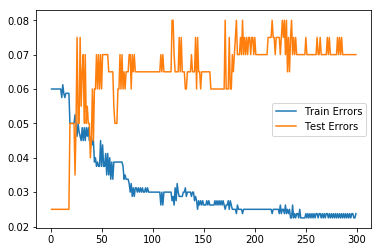

In [26]:
if __name__=="__main__":
    main()